In [31]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv("SPAM_text_message.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

Text(0.5, 1.0, 'Distribution of class')

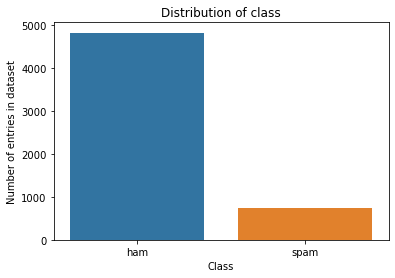

In [8]:
# check distribution of text with class
sns.countplot(data.Category)
plt.xlabel("Class")
plt.ylabel("Number of entries in dataset")
plt.title("Distribution of class")

In [14]:
X = data.Message
y = data.Category

# convert categorical data to one hot encoeded
enc = LabelEncoder()
y = enc.fit_transform(y)
# reshape into one dimesional vector********************
y = y.reshape(-1,1)
y.shape

(5572, 1)

In [17]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("xtrain shape", x_train.shape)
print("ytrain shape", y_train.shape)
print("xtest shape", x_test.shape)
print("ytest shape", y_test.shape)

xtrain shape (4457,)
ytrain shape (4457, 1)
xtest shape (1115,)
ytest shape (1115, 1)


# Data preprocessing
1. Tokenization
2. Remove stopwords
3. Lowercase
4. Remove Punctuations
5. Padding

In [22]:
print("Length of each document:", data.Message.map(lambda x: len(x)))
print()
print("MAX words in among all documents:", data.Message.map(lambda x: len(x)).max())

Length of each document: 0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5572, dtype: int64

MAX words in among all documents: 910


In [38]:

stop = set(stopwords.words("english"))

# remove stopwords
def remove_stop(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

# remove punctuations
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

x_train = x_train.map(remove_stop)
x_train = x_train.map(remove_punct)
x_train

4771    cheers lou yeah goodnite shame u neva came c y...
2276                                   telly brdget jones
2534    glad went well come 11 well plenty time claire...
1161                            sure neighbors didnt pick
3907                       went fast asleep deartake care
                              ...                        
1489                       tell need investigate anywhere
666      en chikku nange bakra msg kalstiyathen teacoffee
4322        k jason says hes gonna around ill around ltgt
1234                              lol ok ill snatch purse
3961         sent lanre fakeyes eckankar details mail box
Name: Message, Length: 4457, dtype: object

In [39]:
# tokenize and convert text to sequence for TRAIN set

# max words in document=910, we are taking max number as 1000
max_words_in_document = 1000
max_len_of_one_sentence = 150
# Tokenization
tok = Tokenizer(num_words=max_words_in_document)
tok.fit_on_texts(x_train)

# Convert text to sequence
input_sequences = tok.texts_to_sequences(x_train)
print(input_sequences[0])
# add padding to sequence to maintain same length of all sequences
x_train_sequence = sequence.pad_sequences(input_sequences, maxlen=max_len_of_one_sentence)
x_train_sequence[0]

[75, 1, 468, 347, 84, 131]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  75,   1, 468, 347,  84, 131])

# Build Model

In [59]:
# model = Sequential()
# model.add(Embedding(max_words_in_document, 50, input_length=max_len_of_one_sentence))
# model.add(LSTM(64, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

In [54]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len_of_one_sentence])
    layer = Embedding(max_words_in_document,50,input_length=max_len_of_one_sentence)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [56]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [57]:
model.compile(loss="binary_crossentropy", optimizer=RMSprop(), metrics=['accuracy'])

In [58]:
model.fit(x_train_sequence, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 13s 4ms/step - loss: 0.3539 - accuracy: 0.8564 - val_loss: 0.2035 - val_accuracy: 0.9675
Epoch 2/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.1178 - accuracy: 0.9719 - val_loss: 0.0739 - val_accuracy: 0.9776
Epoch 3/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.0612 - accuracy: 0.9826 - val_loss: 0.0627 - val_accuracy: 0.9787
Epoch 4/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.0478 - accuracy: 0.9860 - val_loss: 0.0571 - val_accuracy: 0.9809
Epoch 5/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.1113 - accuracy: 0.9717 - val_loss: 0.0570 - val_accuracy: 0.9832


In [60]:
# tokenize and convert text to sequence for TEST set

# Tokenization
tok.fit_on_texts(x_test)

# Convert text to sequence
input_sequences_test = tok.texts_to_sequences(x_test)
print(input_sequences_test[0])
# add padding to sequence to maintain same length of all sequences
x_test_sequence = sequence.pad_sequences(input_sequences_test, maxlen=max_len_of_one_sentence)
x_test_sequence[0]

[17, 60, 265, 37, 12, 520]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  17,  60, 265,  37,  12, 520])

In [61]:
# model evaluation on test set
acc = model.evaluate(x_test_sequence, y_test)

1115/1115 [==============================] - 1s 1ms/step


In [62]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss: 0.978
  Accuracy: 0.788


In [63]:
from sklearn.metrics import classification_report

In [70]:
y_pred = model.predict(x_test_sequence)
y_pred

array([[0.00052896],
       [0.06309447],
       [0.00332615],
       ...,
       [0.00732307],
       [0.1277789 ],
       [0.07120823]], dtype=float32)

In [73]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       985
           1       0.10      0.11      0.11       130

    accuracy                           0.79      1115
   macro avg       0.49      0.49      0.49      1115
weighted avg       0.79      0.79      0.79      1115

